**Importing Dependencies**

In [14]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.datasets import mnist
from keras.layers import Dense, Flatten, Dropout
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD
from keras.utils import np_utils 

In [2]:
# The Data, split between train and test Data

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape, x_train[0].shape )

(60000, 28, 28) (28, 28)


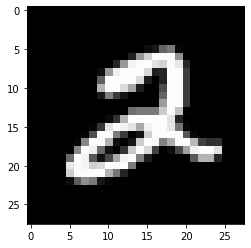

In [4]:
plt.imshow(x_train[5], cmap='gray')

In [5]:
y_train[5]

2

In [6]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [7]:
print(x_train.shape, x_test.shape[0])

(60000, 28, 28) 10000


**Preprocessing our Training and Testing Data**

In [8]:
x_train = x_train.reshape(-1,28,28,1)

x_test  = x_test.reshape(-1,28,28,1)

x_train = x_train.astype('float32')

x_test  = x_test.astype('float32')



In [9]:
x_train = x_train/255
x_test = x_test/255
print(x_train.shape[0], x_test.shape[0])

60000 10000


In [10]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [11]:
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


**Creating the CNN Model fro MNIST Digit Recognition**

In [15]:
model = keras.Sequential()

model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu', input_shape = (28,28,1), padding = 'SAME'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64, (3,3), activation = 'relu', padding = 'SAME'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(10, activation = 'softmax'))


model.compile(
    loss = 'categorical_crossentropy',
    optimizer = SGD(0.01),
    metrics = ['accuracy']
)

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 7, 7, 64)          0         
                                                                 
 flatten (Flatten)           (None, 3136)             

**Training our Model for Digit Recognotion**

In [16]:
history = model.fit(x_train, y_train, epochs = 10, verbose = 1, validation_data = (x_test, y_test))

loss, accuracy = model.evaluate (x_test, y_test)
print('Test Data Loss:', round(loss*100,2), '%')
print('Test Data Accuracy:', round(accuracy*100,2), '%')

Epoch 1/10
1875/1875 [==============================] - 113s 59ms/step - loss: 0.7590 - accuracy: 0.7568 - val_loss: 0.1753 - val_accuracy: 0.9481
Epoch 2/10
1875/1875 [==============================] - 125s 66ms/step - loss: 0.2485 - accuracy: 0.9249 - val_loss: 0.1080 - val_accuracy: 0.9662
Epoch 3/10
1875/1875 [==============================] - 103s 55ms/step - loss: 0.1824 - accuracy: 0.9460 - val_loss: 0.0844 - val_accuracy: 0.9728
Epoch 4/10
1875/1875 [==============================] - 96s 51ms/step - loss: 0.1505 - accuracy: 0.9550 - val_loss: 0.0705 - val_accuracy: 0.9764
Epoch 5/10
1875/1875 [==============================] - 80s 43ms/step - loss: 0.1298 - accuracy: 0.9616 - val_loss: 0.0624 - val_accuracy: 0.9787
Epoch 6/10
1875/1875 [==============================] - 87s 46ms/step - loss: 0.1165 - accuracy: 0.9653 - val_loss: 0.0571 - val_accuracy: 0.9813
Epoch 7/10
1875/1875 [==============================] - 95s 51ms/step - loss: 0.1078 - accuracy: 0.9678 - val_loss: 0.049

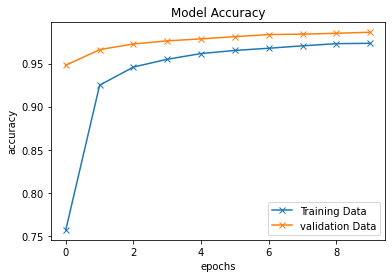

In [17]:
plt.plot(history.history['accuracy'], marker ='x')
plt.plot(history.history['val_accuracy'], marker ='x')

plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')

plt.legend(['Training Data', 'validation Data'], loc= 'lower right')

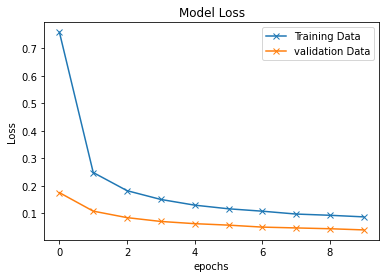

In [18]:
plt.plot(history.history['loss'], marker ='x')
plt.plot(history.history['val_loss'], marker ='x')

plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('epochs')

plt.legend(['Training Data', 'validation Data'], loc= 'upper right')

**Saving the Prediction model**

In [19]:
model.save('MNIST_10_epochs')
print('Model Saved!!')

INFO:tensorflow:Assets written to: MNIST_10_epochs\assets


INFO:tensorflow:Assets written to: MNIST_10_epochs\assets


Model Saved!!
